In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from scipy.sparse import csr_matrix

In [26]:
#from knn_recommender import Recommender

In [30]:
import csv

with open('../data/triplets.txt', 'r') as f:
  reader = csv.reader(f, delimiter='\t')
  with open('../data/triplets_file.csv', 'w') as w:
    writer = csv.writer(w)
    writer.writerows(reader)


In [35]:

song_info = pd.read_csv('../data/triplets_file.csv',sep=',',header=None)
song_info.columns = ['user_id', 'song_id', 'listen_count']



In [36]:
song_info

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SODCXXY12AB0187452,2
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SOWPAXV12A67ADA046,18
3,b64cdd1a0bd907e5e00b39e345194768e330d652,SOLXDDC12A6701FBFD,1
4,b64cdd1a0bd907e5e00b39e345194768e330d652,SONJBQX12A6D4F8382,4
...,...,...,...
772656,8305c896f42308824da7d4386f4b9ee584281412,SOQHWMN12A6701E2D9,1
772657,8305c896f42308824da7d4386f4b9ee584281412,SOSQIHH12A8C13370B,1
772658,8305c896f42308824da7d4386f4b9ee584281412,SOUCKDH12A8C138FF5,2
772659,8305c896f42308824da7d4386f4b9ee584281412,SOULTKQ12AB018A183,4


In [41]:
song_actual = pd.read_csv('../data/formatted_song_csv.txt',sep=',',header=None)
song_actual.columns = ['SongNumber','song_id','AlbumID','AlbumName','ArtistID','ArtistLatitude','ArtistLocation','ArtistLongitude','ArtistName','Danceability','Duration','KeySignature','KeySignatureConfidence','Tempo','TimeSignature','TimeSignatureConfidence','Title','Year']

In [42]:
song_actual

,SongNumber,song_id,AlbumID,AlbumName,ArtistID,ArtistLatitude,ArtistLocation,ArtistLongitude,ArtistName,Danceability,Duration,KeySignature,KeySignatureConfidence,Tempo,TimeSignature,TimeSignatureConfidence,Title,Year
0,1,SOVLGJY12A8C13FBED,223563,b'Call of the Mastodon',ARMQHX71187B9890D3,NaN,b'Atlanta GA',NaN,b'Mastodon',0,280.21506,5,0.555,173.205,5,0.120,b'Deep Sea Creature',2001
1,2,SOMZWCG12A8C13C480,300848,b'Fear Itself',ARD7TVE1187B99BFB1,NaN,b'California - LA',NaN,b'Casual',0,218.93179,1,0.736,92.198,4,0.778,"""bI Didn't Mean To""""""""""",0
2,3,SOCIWDW12A8C13D406,300822,b'Dimensions',ARMJAGH1187FB546F3,35.14968,b'Memphis TN',-90.04892,b'The Box Tops',0,148.03546,6,0.169,121.274,4,0.384,b'Soul Deep',1969
3,4,SOXVLOJ12AB0189215,514953,b'Las Numero 1 De La Sonora Santanera',ARKRRTF1187B9984DA,NaN,b'',NaN,b'Sonora Santanera',0,177.47546,8,0.643,100.070,1,0.000,b'Amor De Cabaret',0
4,5,SONHOTT12A8C13493C,287650,b'Friend Or Foe',AR7G5I41187FB4CE6C,NaN,b'London England',NaN,b'Adam Ant',0,233.40363,0,0.751,119.293,4,0.000,b'Something Girls',1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997,SOLXXPY12A67ADABA0,691752,b'Sin / Pecado',AR4C6V01187FB3BAF4,39.55792,b'Portugal',-7.84481,b'Moonspell',0,386.19383,7,0.374,140.185,4,0.099,b'The Hanged Man',1998
9997,9998,SOAYONI12A6D4F85C8,41649,b'Collection',AR9JLBU1187B9AAEC4,-33.96243,b'Port Elizabeth South Africa',25.62326,b'Danny Williams',0,168.01914,8,0.223,77.072,3,0.597,b'The Wonderful World Of The Young',1998
9998,9999,SOJZLAJ12AB017E8A2,346402,b'Reality',ARS1DCR1187B9A4A56,NaN,b'',NaN,b'Winston Reedy',0,193.72363,1,0.931,118.123,4,0.205,b'Sentimental Man',0
9999,10000,SORZSCJ12A8C132446,86259,b'Nouveau Zydeco',ARAGMIV11F4C843F78,NaN,b'',NaN,"""b'Myrick Freeze"""" Guillory'""""""",0,300.82567,0,0.297,137.663,4,0.000,b'Zydeco In D-Minor',0


In [44]:
#Read song  metadata

song_actual.drop_duplicates(['song_id'], inplace=True)

#Merge the two dataframes above to create input dataframe for recommender systems
songs = pd.merge(song_info, song_actual, on="song_id", how="left")

In [47]:
new_songs = songs[['user_id', 'song_id', 'listen_count', 'Title', 'AlbumName','ArtistName', 'Year']]

In [121]:
new_songs
new_songs.to_csv('../data/new_songs.csv', index=False)

In [49]:
new_songs.isnull().sum()

user_id         0
song_id         0
listen_count    0
Title           0
AlbumName       0
ArtistName      0
Year            0
dtype: int64

In [50]:
new_songs.dtypes

user_id         object
song_id         object
listen_count     int64
Title           object
AlbumName       object
ArtistName      object
Year             int64
dtype: object

In [52]:
unique_songs = new_songs['Title'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 3624 unique songs in the dataset


In [54]:
#Unique artists
unique_artists = new_songs['ArtistName'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")

There are 2056 unique artists in the dataset


In [55]:
#Unique users
unique_users = new_songs['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 418252 unique users in the dataset


## Popular songs

In [56]:
ten_pop_songs = new_songs.groupby('Title')['listen_count'].count().reset_index().sort_values(['listen_count', 'Title'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100, 2)

In [57]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

,Title,listen_count,percentage
288,"""bNothin' On You [feat. Bruno Mars] (Album Ver...",30117,3.90
2943,b'Supermassive Black Hole (Album Version)',28286,3.66
146,"""bHips Don't Lie (featuring Wyclef Jean)""""""""""",16128,2.09
959,b'Crawling (Album Version)',14729,1.91
97,"""bDon't Panic""""""""""",11610,1.50
554,b'Angie (1993 Digital Remaster)',11027,1.43
963,b'Crazy',10371,1.34
621,b'Baby Boy [feat. Beyonce]',8797,1.14
842,b'Check On It',8516,1.10
420,b'15 Step',7765,1.00


In [59]:
labels = ten_pop_songs['Title'].tolist()
counts = ten_pop_songs['listen_count'].tolist()

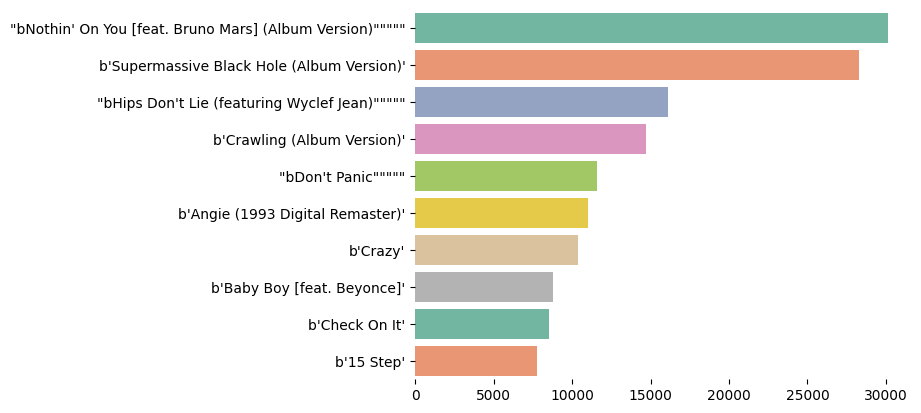

In [61]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

## Popular Artists

In [63]:
ten_pop_artists  = new_songs.groupby(['ArtistName'])['listen_count'].count().reset_index().sort_values(['listen_count', 'ArtistName'], 
                                                                                                ascending = [0,1])

In [64]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

,ArtistName,listen_count
1273,b'Muse',39983
165,b'B.o.B',30117
1085,b'Linkin Park',20659
408,b'Coldplay',19595
1463,b'Radiohead',19322
1579,b'Shakira Featuring Wyclef Jean',16128
1859,b'The Rolling Stones',14075
854,b'Jack Johnson',12426
75,b'Aerosmith',10736
1024,b'Kings Of Leon',9503


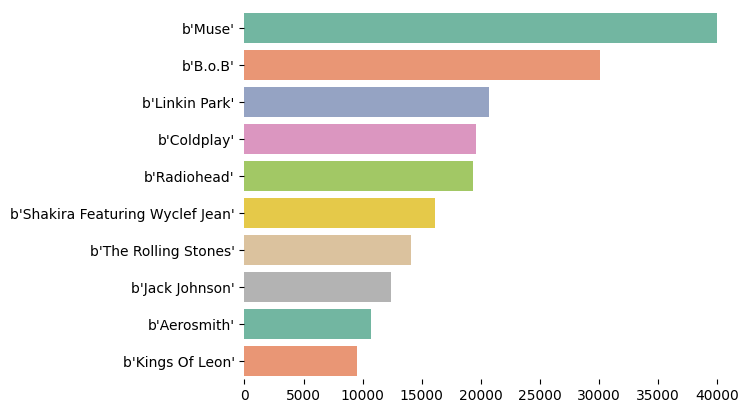

In [65]:
plt.figure()
labels = ten_pop_artists['ArtistName'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

## Listen count by users

In [66]:
listen_counts = pd.DataFrame(new_songs.groupby('listen_count').size(), columns=['count'])

In [68]:
print(f"The maximum time the same user listened to the same song was: {listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]}")

The maximum time the same user listened to the same song was: 771


In [70]:
print(f"On average, a user listen to the same song {new_songs['listen_count'].mean()} times")

On average, a user listen to the same song 2.684340221649598 times


In [71]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)

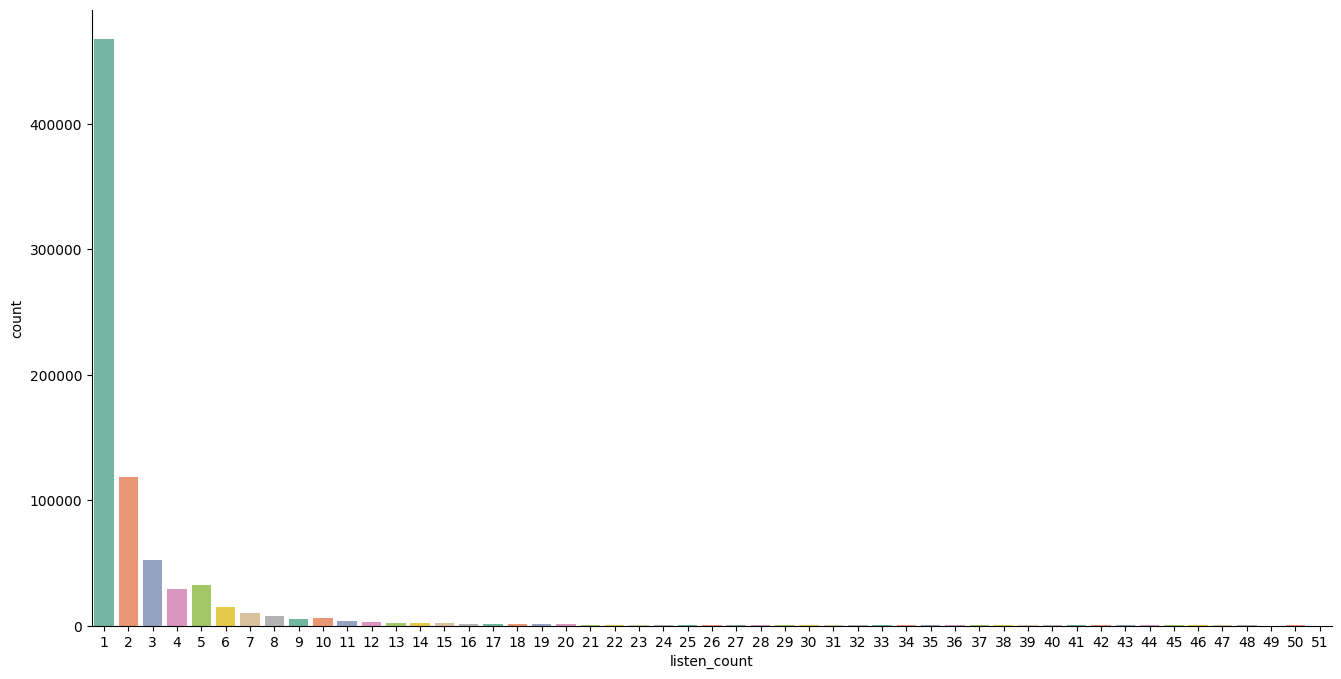

In [73]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set2', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [78]:
song_user = new_songs.groupby('user_id')['song_id'].count()

/var/folders/5b/_80n_r3s42d_yc94yjfdh__c0000gn/T/ipykernel_33966/2530348831.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='orange')


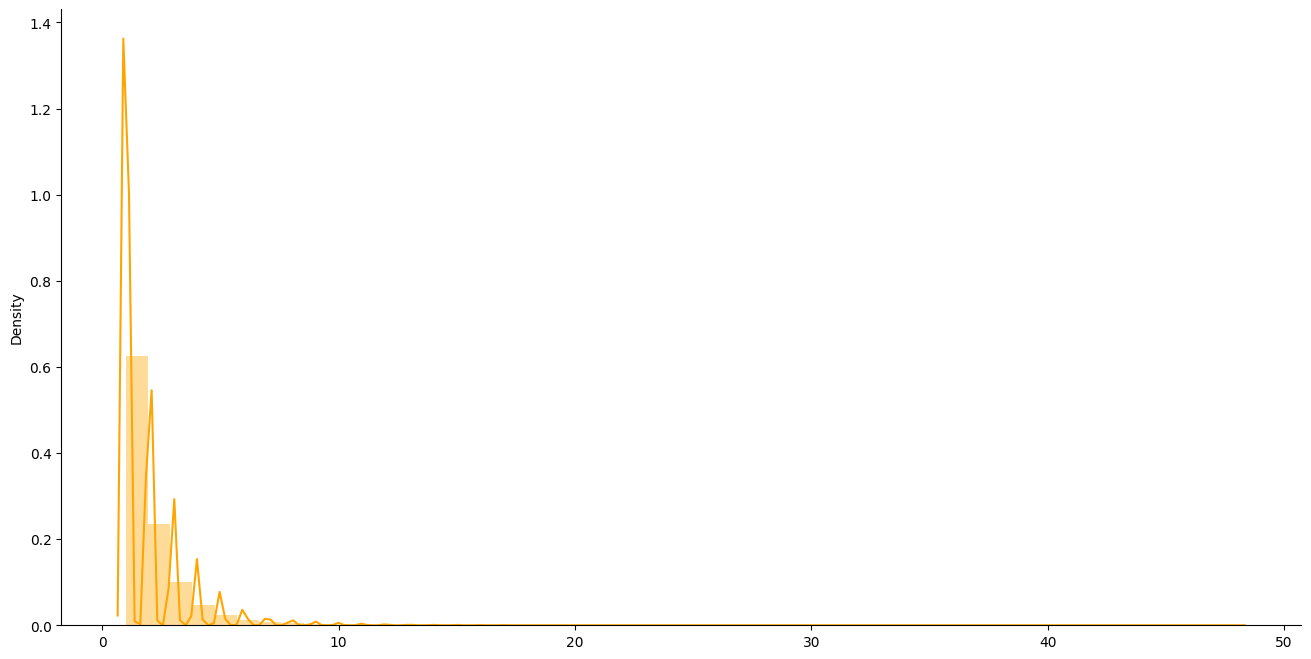

In [79]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [80]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 1.8473575739028145 songs


In [81]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 1.0 songs, with minimum 1 and maximum 48 songs


In [82]:

# Get how many values should it be if all songs have been listen by all users
values_matrix = unique_users * unique_songs

In [84]:
# Substract the total values with the actural shape of the DataFrame songs
zero_values_matrix = values_matrix - new_songs.shape[0]

In [85]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 1514972587 values that are zero


In [86]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()

In [88]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = new_songs[new_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)

In [89]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [90]:
df_songs_features.head()

user_id,0150221bdccf11ec9d756440b0c1aa0a1540d177,020ad5614db88fc20286b4ec297ed3026a3c16d2,02ade3395143d3f19a0d11262e6d51dee883ef53,039280e02d8af92f4266615097cccf5a8e28d7cf,0394088dd86f4de2fdffe80126c1d73b95b7fd30,0707efaf1e978bef026cf1c45114a34fb69a07fe,0b3fb822a274902cc7204904baaeb8f0662a1b88,0c2932cb475b83b61039bdfbb72c14580b8fad2b,0db29a2e92592e74011c68542890dc0a498d6367,1056aa0466b31e71f3d7efacec35d2e9a28cce4a,...,f58c9a254a92406ca0e47184fc6dee1ad8232278,f6bda2088d3985d727620e6ccc37b3a15707ae97,f6d78516f331c684ee611e07effcb796e94ae456,fa5d9eddc010bc3fc71f8a42db15e5dd4f1c18a3,fb644c3f2a83114325dc67b97df0bce60b5ac9a1,fbee1c8ce1a346fa07d2ef648cec81117438b91f,fe9a05c03c29da973743a83b80d1660748077432,fecc6dad5c9b67ac8d2ccf2b400da676ca0faad5,fef771ab021c200187a419f5e55311390f850a50,ff63d407f1d4a7d9c13c2d944d521819e14847d4
song_id,,,,,,,,,,,,,,,,,,,,,
SOAAEHR12A6D4FB060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOABFQI12A58A7D162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOABLAF12AB018E1D9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOABRXK12A8C130A36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SOABTKM12A8AE4721E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
df_unique_songs = new_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'Title']]


In [105]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].Title))
}

## Recommendation

In [106]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
import numpy as np

class Recommender:
    def __init__(self, metric, algorithm, k, data, decode_id_song):
        self.metric = metric
        self.algorithm = algorithm
        self.k = k
        self.data = data
        self.decode_id_song = decode_id_song
        self.data = data
        self.model = self._recommender().fit(data)
    
    def make_recommendation(self, new_song, n_recommendations):
        recommended = self._recommend(new_song=new_song, n_recommendations=n_recommendations)
        print("... Done")
        return recommended 
    
    def _recommender(self):
        return NearestNeighbors(metric=self.metric, algorithm=self.algorithm, n_neighbors=self.k, n_jobs=-1)
    
    def _recommend(self, new_song, n_recommendations):
        # Get the id of the recommended songs
        recommendations = []
        recommendation_ids = self._get_recommendations(new_song=new_song, n_recommendations=n_recommendations)
        # return the name of the song using a mapping dictionary
        recommendations_map = self._map_indeces_to_song_title(recommendation_ids)
        # Translate this recommendations into the ranking of song titles recommended
        for i, (idx, dist) in enumerate(recommendation_ids):
            recommendations.append(recommendations_map[idx])
        return recommendations
                 
    def _get_recommendations(self, new_song, n_recommendations):
        # Get the id of the song according to the text
        recom_song_id = self._fuzzy_matching(song=new_song)
        # Start the recommendation process
        print(f"Starting the recommendation process for {new_song} ...")
        # Return the n neighbors for the song id
        distances, indices = self.model.kneighbors(self.data[recom_song_id], n_neighbors=n_recommendations+1)
        return sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    
    def _map_indeces_to_song_title(self, recommendation_ids):
        # get reverse mapper
        return {song_id: song_title for song_title, song_id in self.decode_id_song.items()}
    
    def _fuzzy_matching(self, song):
        match_tuple = []
        # get match
        for title, idx in self.decode_id_song.items():
            ratio = fuzz.ratio(title.lower(), song.lower())
            if ratio >= 60:
                match_tuple.append((title, idx, ratio))
        # sort
        match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
        if not match_tuple:
            print(f"The recommendation system could not find a match for {song}")
            return
        return match_tuple[0][1]


In [107]:
model = Recommender(metric='cosine', algorithm='brute', k=20, data=mat_songs_features, decode_id_song=decode_id_song)

In [116]:
song = "b'The Hanged Man"

In [117]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=10)

Starting the recommendation process for b'The Hanged Man ...
... Done


In [118]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for b'The Hanged Man are:
["b'Helena 2 (Album Version)'", '"bWorld Comes Tumblin\' Down"""""', "b'Ask The Angels'", "b'Dance Hall Days'", "b'Oh Serena'", "b'Sachmagehtsnoch'", "b'Zornig!'", "b'Halloween II'", "b'Dig Up Her Bones'", "b'We Bite'"]
